<a href="https://colab.research.google.com/github/ankitarashmi/EVAAssignments/blob/master/FirstIteration_Seesion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


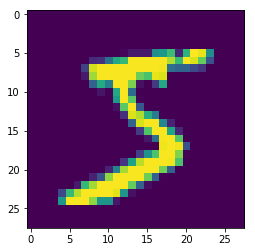

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#Normalization of Pixels


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Vanilla Model
Architecture with Convolution and transition blocks

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #(26,26,32) RF:3X3

model.add(Convolution2D(64, 3, 3, activation='relu')) #(24,24,64) RF:5X5
model.add(Convolution2D(128, 3, 3, activation='relu')) #(22,22,128) RF:7X7

model.add(MaxPooling2D())
model.add(Convolution2D(32, 1, activation='relu'))  #(11,11,32) RF :7X7

model.add(Convolution2D(64, 3,3, activation='relu')) #(9,9,64) RF:9X9
model.add(Convolution2D(128, 3, 3, activation='relu'))#(7,7,128) RF:13X13

model.add(Convolution2D(10, 1, activation='relu'))
          
model.add(Convolution2D(10,7))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 128)         73856     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  del sys.path[0]


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#Accuracy of 99.22
#Number of parameters:195,352


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20,validation_data=(X_test,Y_test), verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 248us/step - loss: 0.1650 - acc: 0.9488 - val_loss: 0.0614 - val_acc: 0.9797
Epoch 2/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.0551 - acc: 0.9825 - val_loss: 0.0436 - val_acc: 0.9857
Epoch 3/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.0406 - acc: 0.9875 - val_loss: 0.0434 - val_acc: 0.9864
Epoch 4/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0327 - acc: 0.9896 - val_loss: 0.0309 - val_acc: 0.9907
Epoch 5/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0262 - acc: 0.9917 - val_loss: 0.0355 - val_acc: 0.9885
Epoch 6/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.0224 - acc: 0.9927 - val_loss: 0.0395 - val_acc: 0.9883
Epoch 7/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.0186 - acc: 0.9940 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.05064295390050806, 0.9884]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.0483735e-20 1.1686657e-19 1.2727695e-12 4.6403179e-14 2.2863355e-22
  5.3396763e-19 1.7322162e-35 1.0000000e+00 7.3862430e-21 6.1661647e-14]
 [1.8873293e-14 1.5236914e-13 1.0000000e+00 8.6184423e-14 1.9312890e-23
  7.8803235e-23 4.4065137e-11 2.2826417e-21 1.2424323e-16 4.4918900e-30]
 [6.4861392e-14 9.9999988e-01 4.2155128e-09 1.0119672e-11 2.1063903e-08
  4.4008903e-09 7.7297408e-13 7.5192411e-08 4.4212607e-12 2.6242298e-13]
 [1.0000000e+00 2.4032614e-16 9.0543655e-15 7.1776434e-13 5.0101974e-18
  3.8149128e-13 1.1137253e-10 7.7825652e-18 3.8654111e-11 3.1882661e-15]
 [7.3168221e-17 2.2191014e-18 1.8166692e-21 8.1606970e-25 1.0000000e+00
  1.8617447e-21 4.5104616e-18 2.7775283e-21 1.8947991e-18 2.7780150e-14]
 [1.1290383e-12 1.0000000e+00 1.1299065e-08 4.8059001e-13 3.2021237e-08
  1.5365935e-10 8.4122249e-12 1.5697614e-08 2.2036791e-12 4.3147400e-13]
 [2.1914328e-26 3.0846162e-14 4.0390335e-19 5.0927582e-29 1.0000000e+00
  2.3320146e-16 1.5397194e-27 6.8898839e-14 1.6231206e-18 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
layer_dict

{'activation_2': <keras.layers.core.Activation at 0x7fec3a420d30>,
 'conv2d_10': <keras.layers.convolutional.Conv2D at 0x7fec3a4cc8d0>,
 'conv2d_11': <keras.layers.convolutional.Conv2D at 0x7fec3a476898>,
 'conv2d_12': <keras.layers.convolutional.Conv2D at 0x7fec3a476a58>,
 'conv2d_13': <keras.layers.convolutional.Conv2D at 0x7fec3a48b128>,
 'conv2d_14': <keras.layers.convolutional.Conv2D at 0x7fec3a48bc50>,
 'conv2d_15': <keras.layers.convolutional.Conv2D at 0x7fec3a43f2b0>,
 'conv2d_8': <keras.layers.convolutional.Conv2D at 0x7fec3a4cc588>,
 'conv2d_9': <keras.layers.convolutional.Conv2D at 0x7fec3a4cc550>,
 'flatten_2': <keras.layers.core.Flatten at 0x7fec3a44ed30>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x7fec3a4cc908>}

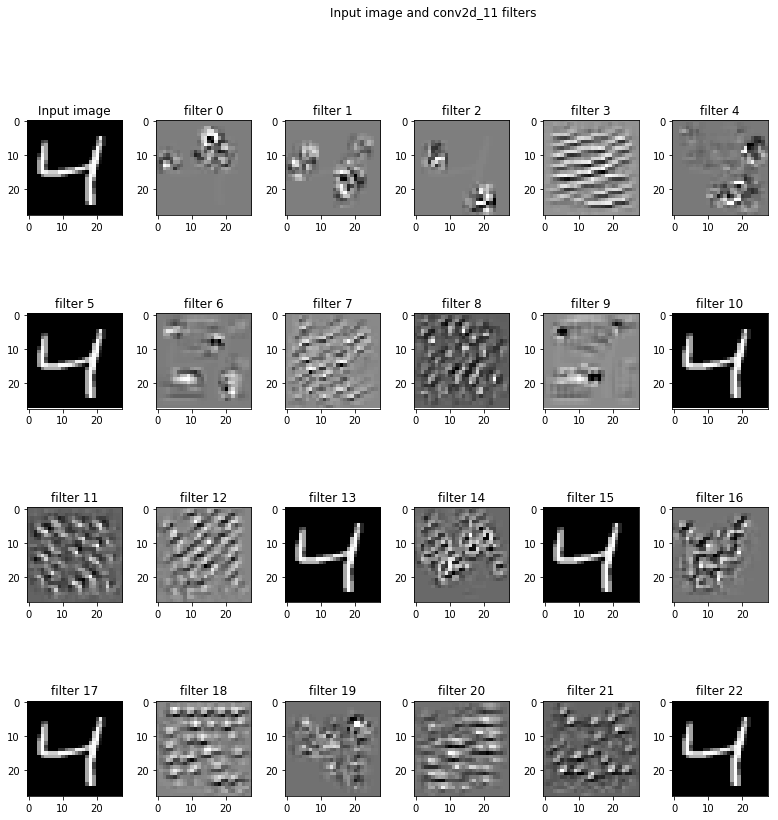

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_11'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()